In [226]:
import numpy as np
import cv2, random, sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

np.set_printoptions(threshold=sys.maxsize)

In [227]:
img = cv2.imread('images/test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale

small = cv2.imread('images/small.png')
small_gray = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)

imsize = 512
noise = np.random.rand(imsize, imsize)*255

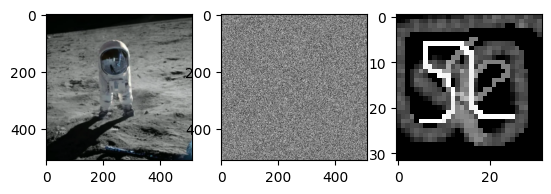

In [228]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(img, cmap='gray')
axs[1].imshow(noise, cmap='gray')
axs[2].imshow(small_gray, cmap='gray')

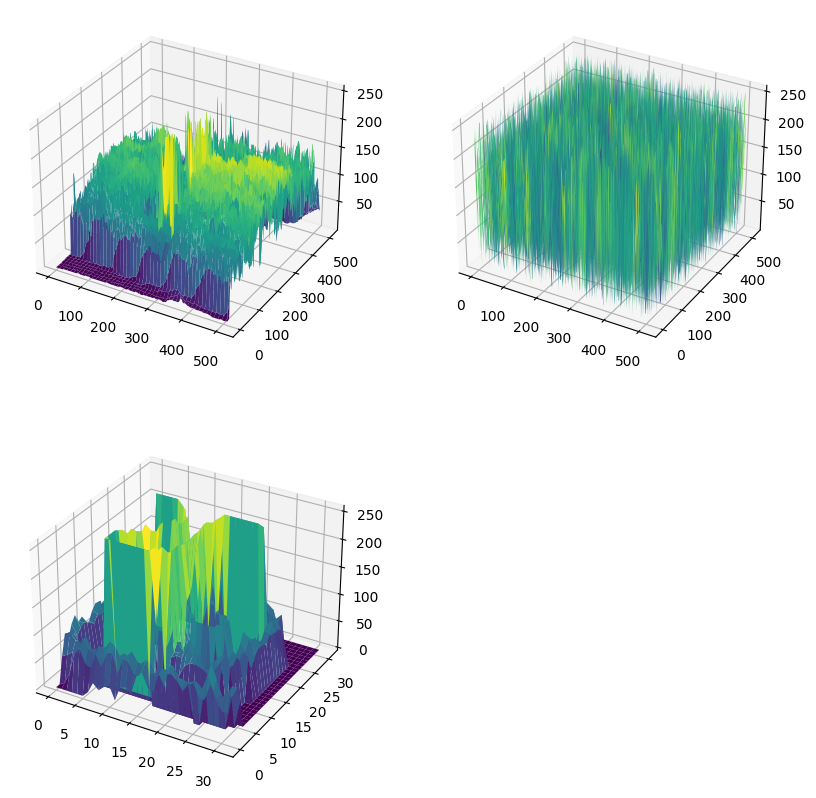

In [229]:
heightmap = plt.figure(figsize=(10, 10))
plt1 = heightmap.add_subplot(221, projection='3d')
plt2 = heightmap.add_subplot(222, projection='3d')
plt3 = heightmap.add_subplot(223, projection='3d')

x1 = y1 = range(imsize)
X1, Y1 = np.meshgrid(x1, y1)  # `plot_surface` expects `x` and `y` data to be 2D

x2 = y2 = range(small.shape[0])
X2, Y2 = np.meshgrid(x2, y2)

plt1.plot_surface(X1, Y1, gray, cmap="viridis")
plt2.plot_surface(X1, Y1, noise, cmap="viridis")
plt3.plot_surface(X2, Y2, small_gray, cmap="viridis")

plt.show()

In [230]:
def apply_filter(kernel, image, x, y):
    # neighbourhood is of size (2a+1)x(2b+1)
    a = (kernel.shape[0] - 1) // 2
    b = (kernel.shape[1] - 1) // 2
    size = image.shape[0]
    sum = 0
    for i in range(-a, a+1, 1):
        for j in range(-b, b+1, 1):
            value = image[(x+i) % size][(y+j) % size]
            sum += kernel[i][j] * value
    return sum

def linear_filter(kernel, image):
    filtered = np.copy(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            filtered[x][y] = apply_filter(kernel, image, x, y)
    return filtered

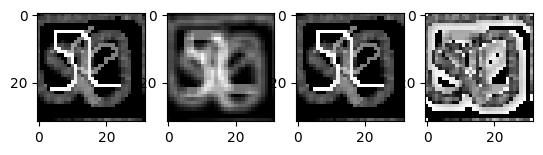

In [231]:
kernelI = np.array([[0,0,0],[0,1,0],[0,0,0]])
kernel_smooth = 1/9 * np.ones((3, 3))
kernel_shift = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]])
kernel_sharpen = 2 * kernelI - kernel_smooth

input = small_gray
identity = linear_filter(kernelI, input)
smooth = linear_filter(kernel_smooth, input)
shifted = linear_filter(kernel_shift, input)
sharpened = linear_filter(kernel_sharpen, input)

fig, axs = plt.subplots(1, 4)
axs[0].imshow(identity, cmap='gray')
axs[1].imshow(smooth, cmap='gray')
axs[2].imshow(shifted, cmap='gray')
axs[3].imshow(sharpened, cmap='gray')

plt.show()
